# Mnist data

In [18]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [5]:
os.listdir('fashion')

['fashion-mnist_test.csv', 'fashion-mnist_train.csv']

In [6]:
data_train=pd.read_csv('fashion/fashion-mnist_train.csv')
data_test=pd.read_csv('fashion/fashion-mnist_test.csv')

In [7]:
data_train.iloc[:,0]

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [8]:
data_train.shape

(60000, 785)

In [9]:
data_test.shape

(10000, 785)

In [10]:
#train data
x=np.array(data_train.iloc[:,1:])
y=to_categorical(np.array(data_train.iloc[:,0]))

In [11]:
x.shape

(60000, 784)

In [12]:
#split data
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
#test data
x_test=np.array(data_test.iloc[:,1:])
y_test=to_categorical(np.array(data_test.iloc[:,0]))

In [14]:
#normalization
x_train=x_train/255.0
x_test=x_test/255.0
x_val=x_val/255.0

# reshape/resieze data

In [15]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_val=x_val.reshape(x_val.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [16]:
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')

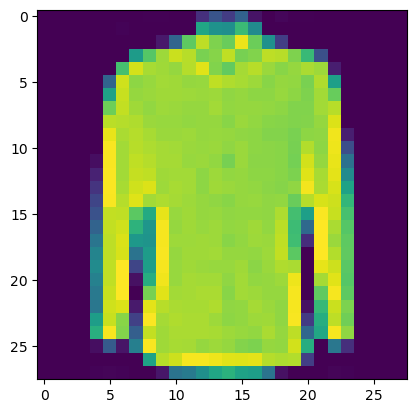

In [19]:
plt.imshow(x_train[4])

# Model Training

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 5

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [22]:
history=model.fit(x_train,y_train,
        batch_size=batch_size,
        epochs=epochs,
         verbose=1,
        validation_data=(x_val,y_val)
         )
score=model.evaluate(x_test,y_test,verbose=1)

Epoch 1/5
188/188 [==============================] - 110s 547ms/step - loss: 0.8598 - accuracy: 0.6778 - val_loss: 0.5299 - val_accuracy: 0.8027
Epoch 2/5
188/188 [==============================] - 102s 544ms/step - loss: 0.5288 - accuracy: 0.8015 - val_loss: 0.4464 - val_accuracy: 0.8337
Epoch 3/5
188/188 [==============================] - 103s 549ms/step - loss: 0.4546 - accuracy: 0.8315 - val_loss: 0.3821 - val_accuracy: 0.8635
Epoch 4/5
188/188 [==============================] - 102s 545ms/step - loss: 0.4160 - accuracy: 0.8449 - val_loss: 0.3445 - val_accuracy: 0.8779
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 0.3001 - accuracy: 0.8926


In [23]:
print('test loss:',score[0])
print('test accuracy:',score[1])

test loss: 0.3001488447189331
test accuracy: 0.8925999999046326


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

range(0, 5)


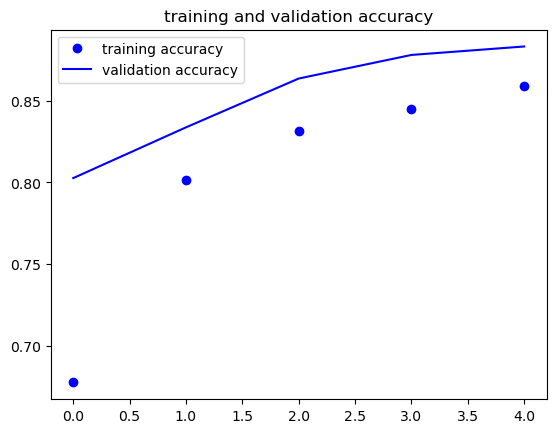

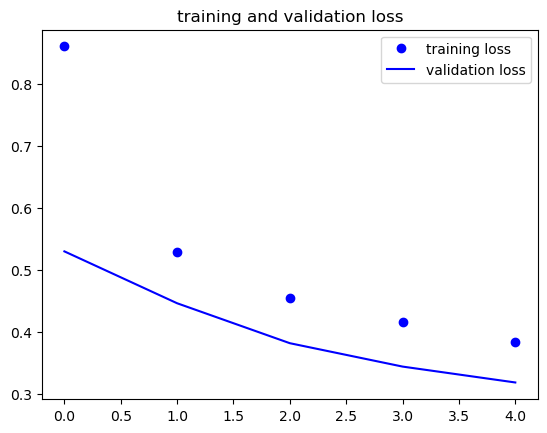

In [25]:
epoch=range(len(accuracy))
print(epoch)
plt.plot(range(5),accuracy,'bo',label='training accuracy')
plt.plot(range(5),val_accuracy,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(range(5),loss,'bo',label='training loss')
plt.plot(range(5),val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

# Prediction

In [26]:
pred_class=model.predict(x_test)

313/313 [==============================] - 6s 17ms/step


In [27]:
y_true=data_test.iloc[:,0]
y_true.shape

(10000,)

In [28]:
pred_class.shape

(10000, 10)

In [29]:
correct=np.nonzero(pred_class[0]==y_true[0])
correct

(array([], dtype=int64),)

In [30]:
incorrect=np.nonzero(pred_class[0]==y_true[0])
incorrect

(array([], dtype=int64),)

In [31]:
#get the predictions for the test data
predicted_classes = model.predict(x_test)
y_pred_classes = np.argmax(predicted_classes,axis = 1)

313/313 [==============================] - 6s 18ms/step


In [32]:
y_pred_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [33]:
y_true = data_test.iloc[:, 0]
y_true.size

10000

In [88]:
y_pred_classes =np.array(y_pred_classes) 
y_pred_classes = y_pred_classes.flatten()
y_true =np.array(y_true)
y_true = y_true.flatten()
print("Shape of y_pred_classes:", y_pred_classes.shape)
print("Shape of y_true:", y_true.shape)

correct = np.nonzero(y_pred_classes==y_true)
incorrect = np.nonzero(y_pred_classes!=y_true)

Shape of y_pred_classes: (10000,)
Shape of y_true: (10000,)


In [48]:
from sklearn.metrics import classification_report
target_neames=['class {}'.format(i) for i in range(10)]
print(classification_report(y_true, y_pred_classes, target_names=target_neames))

              precision    recall  f1-score   support

     class 0       0.83      0.83      0.83      1000
     class 1       0.98      0.98      0.98      1000
     class 2       0.79      0.88      0.83      1000
     class 3       0.91      0.92      0.91      1000
     class 4       0.84      0.82      0.83      1000
     class 5       0.98      0.96      0.97      1000
     class 6       0.72      0.64      0.68      1000
     class 7       0.95      0.94      0.95      1000
     class 8       0.98      0.96      0.97      1000
     class 9       0.94      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [49]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

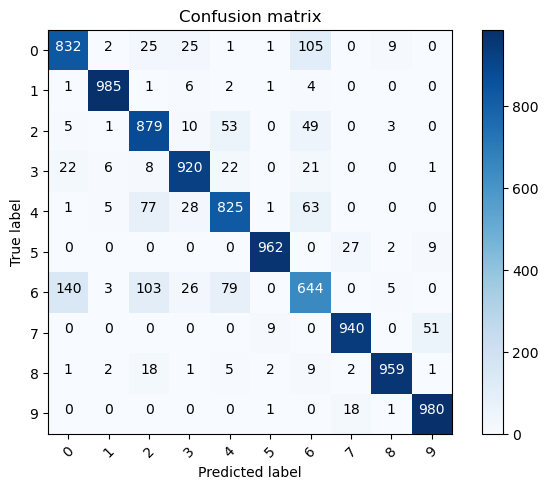

In [50]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [75]:
x_test.shape

(10000, 28, 28, 1)

In [108]:
correct = np.nonzero(y_pred_classes==y_true)

In [110]:
correct

(array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),)

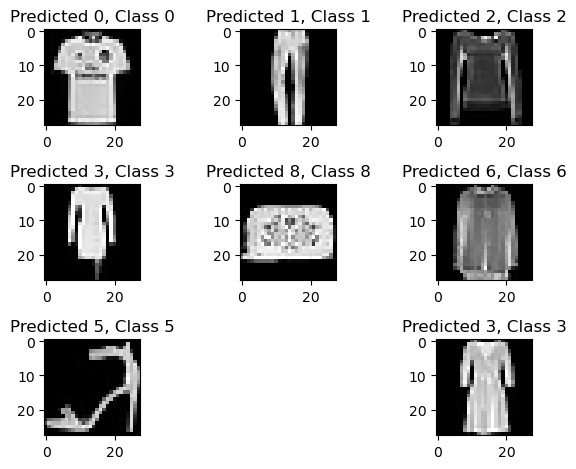

In [112]:
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_classes[correct], y_true[correct]))
    plt.tight_layout()

In [113]:
incorrect = np.nonzero(y_pred_classes!=y_true)

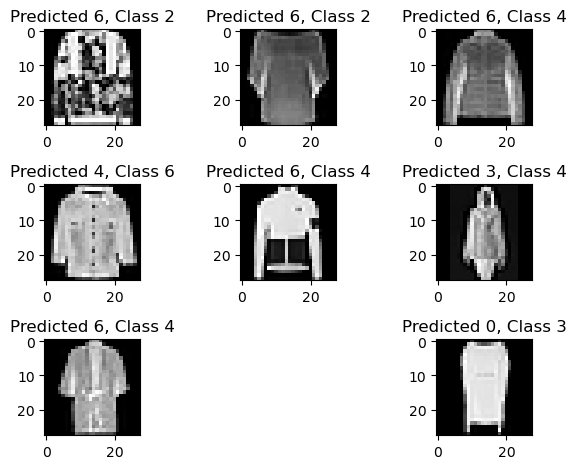

In [115]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()